In [74]:
import pandas as pd
import numpy as np
import os, sys

In [41]:
df = pd.read_csv("../Dados/original_data.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Carimbo de data/hora                                                   167 non-null    object
 1   Informe o ano que você evadiu (saiu) da UFOP:                          167 non-null    int64 
 2   Período de evasão:                                                     167 non-null    object
 3   Sexo:                                                                  167 non-null    object
 4   Idade (idade em que saiu do curso):                                    167 non-null    int64 
 5   Qual período você estava quando saiu:                                  166 non-null    object
 6   Selecione o(s) possíveis motivos que levou você a abandonar o curso:   163 non-null    object
 7   

In [43]:
df.head()

,Carimbo de data/hora,Informe o ano que você evadiu (saiu) da UFOP:,Período de evasão:,Sexo:,Idade (idade em que saiu do curso):,Qual período você estava quando saiu:,Selecione o(s) possíveis motivos que levou você a abandonar o curso:,Descreva em uma frase o que levou você a largar o curso:
0,2019/10/15 9:01:32 PM GMT-3,2013,1º SEMESTRE,Feminino,20,4,Oportunidade de ingresso no ICEA em curso dife...,NaN
1,2019/10/15 9:05:55 PM GMT-3,2015,1º SEMESTRE,Masculino,19,3,Oportunidade de ingresso em outra faculdade co...,"Consegui passar em outra universidade, em uma ..."
2,2019/10/15 9:05:59 PM GMT-3,2019,1º SEMESTRE,Masculino,19,1,Problemas financeiros;Problemas psicológicos;F...,adaptacao
3,2019/10/15 9:06:53 PM GMT-3,2017,2º SEMESTRE,Masculino,21,3,Problemas financeiros;Problemas familiares;Opo...,Acabei desistindo da área. Virei concurseiro
4,2019/10/15 9:07:47 PM GMT-3,2017,2º SEMESTRE,Feminino,23,8,Problemas psicológicos;Baixo rendimento nas di...,Professores dificultam muito a nossa estadia n...


### Ajustando data set inicial.


1. Devido ao carácter explicativo que um formulário precisa ter, nossas features possuem nomes usualmente grandes para trabalhar na análise e manipualação de dados. Assim renomearemos cada um dos nomes, para ficilitar o trabalho no decorrer do processo.

Vamos inicialmente remover a primeira coluna, pois não possui informações relevantes à serem tratadas

In [44]:
df.drop(columns=["Carimbo de data/hora"], inplace = True)

In [45]:
df.rename(columns={"Informe o ano que você evadiu (saiu) da UFOP:": "AnoEvasao",
                   "Período de evasão:": "SemestreEvasao",
                   "Sexo:": "Sexo",
                   "Idade (idade em que saiu do curso):": "IdadeEvasao",
                   "Qual período você estava quando saiu: ": "PeriodoEvasao",
                   "Selecione o(s) possíveis motivos que levou você a abandonar o curso: ": "MotivosEvasao",
                   "Descreva em uma frase o que levou você a largar o curso: ": "TextoEvasao"}, inplace = True)

2. Verificando ocorrência de observações duplicadas

In [46]:
df[df.duplicated(keep=False)]

,AnoEvasao,SemestreEvasao,Sexo,IdadeEvasao,PeriodoEvasao,MotivosEvasao,TextoEvasao
76,2018,1º SEMESTRE,Masculino,20,1,Problemas com professores específicos.,total falta de respeito de alguns professores ...
78,2018,1º SEMESTRE,Masculino,20,1,Problemas com professores específicos.,total falta de respeito de alguns professores ...


In [47]:
df.drop_duplicates(inplace=True)

In [48]:
print(df.columns)

Index(['AnoEvasao', 'SemestreEvasao', 'Sexo', 'IdadeEvasao', 'PeriodoEvasao',
       'MotivosEvasao', 'TextoEvasao'],
      dtype='object')


 3. Com os nomes devidamente alterados, faremos agora alterações nos tipos de dados de cada uma dos nossos atributos.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 166
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AnoEvasao       166 non-null    int64 
 1   SemestreEvasao  166 non-null    object
 2   Sexo            166 non-null    object
 3   IdadeEvasao     166 non-null    int64 
 4   PeriodoEvasao   165 non-null    object
 5   MotivosEvasao   162 non-null    object
 6   TextoEvasao     133 non-null    object
dtypes: int64(2), object(5)
memory usage: 10.4+ KB


In [50]:
df.SemestreEvasao = df.SemestreEvasao.astype("category")
df.Sexo = df.Sexo.astype("category")
df.IdadeEvasao = df.IdadeEvasao.astype("int64")
df.PeriodoEvasao = df.PeriodoEvasao.astype("category")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 166
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   AnoEvasao       166 non-null    int64   
 1   SemestreEvasao  166 non-null    category
 2   Sexo            166 non-null    category
 3   IdadeEvasao     166 non-null    int64   
 4   PeriodoEvasao   165 non-null    category
 5   MotivosEvasao   162 non-null    object  
 6   TextoEvasao     133 non-null    object  
dtypes: category(3), int64(2), object(2)
memory usage: 7.6+ KB


In [52]:
df.head()

,AnoEvasao,SemestreEvasao,Sexo,IdadeEvasao,PeriodoEvasao,MotivosEvasao,TextoEvasao
0,2013,1º SEMESTRE,Feminino,20,4,Oportunidade de ingresso no ICEA em curso dife...,NaN
1,2015,1º SEMESTRE,Masculino,19,3,Oportunidade de ingresso em outra faculdade co...,"Consegui passar em outra universidade, em uma ..."
2,2019,1º SEMESTRE,Masculino,19,1,Problemas financeiros;Problemas psicológicos;F...,adaptacao
3,2017,2º SEMESTRE,Masculino,21,3,Problemas financeiros;Problemas familiares;Opo...,Acabei desistindo da área. Virei concurseiro
4,2017,2º SEMESTRE,Feminino,23,8,Problemas psicológicos;Baixo rendimento nas di...,Professores dificultam muito a nossa estadia n...


### Engenharia de dados

1. Criação de novas features a partir dos Motivos de evasão possíveis de serem escolhidos, selecionados pelos alunos.

A ideia inicial é:

Criar uma matriz de incidência onde cada motivo de evasão será transformado em um feature, e se for citado pelo aluno, assinalaremos 1 em sua matriz.

 Dado todas as respostas contidas no atributo MotivoEvasao, criaremos um conjunto com todos motivos possíveis, com o módulo CountVectorizer, fazer uma vetorização de cada motivo, ou seja, a própria matriz de incidência.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

Para utilizar o *CountVectorizer*, faremos uma limpeza no nosso conjunto de respostas possíveis, retiraremos todos os espaços entre palavras e aplicaremos um espaço entre motivos, pois desejamos que cada motivo seja entendido pelo módulo como uma palavra.

In [54]:
def cria_corpus(textos: list) -> list:

  for i in range(len(textos)):

    if type(textos[i]) is not str:
      textos[i] = ""

    if type(textos[i]) == str:
      textos[i] = textos[i].replace(" ", "").replace("/","").replace(";", " ").replace(".", "").replace("(","").replace(")","")
    
  return textos

In [55]:
## Retirando as respostas do nosso conjunto de dados
textos = df.MotivosEvasao.values
textos = np.array(textos).tolist()
print(type(textos))
print(textos)

<class 'list'>
['Oportunidade de ingresso no ICEA em curso diferente;Oportunidade de ingresso na UFOP em curso diferente;Desinteresse com curso escolhido', 'Oportunidade de ingresso em outra faculdade com mesmo curso;Oportunidade de trabalho', 'Problemas financeiros;Problemas psicológicos;Fim de relacionamento;Distanciamento da família;Oportunidade de ingresso em outra faculdade com mesmo curso;Oportunidade de trabalho', 'Problemas financeiros;Problemas familiares;Oportunidade de ingresso em outra faculdade com mesmo curso;Oportunidade de ingresso em outra faculdade em curso diferente;Oportunidade de ingresso no ICEA em curso diferente;Dificuldade na área escolhida;Desinteresse com curso superior em geral;Baixo rendimento nas disciplinas;Problemas com aprendizado em relação ao conteúdo', 'Problemas psicológicos;Baixo rendimento nas disciplinas;Problemas com uma disciplina em específico.;Problemas com professores específicos.;Problemas com aprendizado em relação ao conteúdo', 'Desintere

In [56]:
## Assim, criamos então nosso corpo de todas as resposas devidamente tratadas
corpus = cria_corpus(textos)

In [57]:
print(corpus)
print(len(corpus))

['OportunidadedeingressonoICEAemcursodiferente OportunidadedeingressonaUFOPemcursodiferente Desinteressecomcursoescolhido', 'Oportunidadedeingressoemoutrafaculdadecommesmocurso Oportunidadedetrabalho', 'Problemasfinanceiros Problemaspsicológicos Fimderelacionamento Distanciamentodafamília Oportunidadedeingressoemoutrafaculdadecommesmocurso Oportunidadedetrabalho', 'Problemasfinanceiros Problemasfamiliares Oportunidadedeingressoemoutrafaculdadecommesmocurso Oportunidadedeingressoemoutrafaculdadeemcursodiferente OportunidadedeingressonoICEAemcursodiferente Dificuldadenaáreaescolhida Desinteressecomcursosuperioremgeral Baixorendimentonasdisciplinas Problemascomaprendizadoemrelaçãoaoconteúdo', 'Problemaspsicológicos Baixorendimentonasdisciplinas Problemascomumadisciplinaemespecífico Problemascomprofessoresespecíficos Problemascomaprendizadoemrelaçãoaoconteúdo', 'Desinteressecomcursoescolhido', 'Problemaspsicológicos Oportunidadedeingressoemoutrafaculdadeemcursodiferente Dificuldadenaáreaes

In [58]:
## Vetorização do nosso corpus, foi gerado uma lista de valores únicos para cada resposta possível
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(corpus)
print(vectorized.toarray().shape)
print(vectorizer.get_feature_names_out())

(166, 27)
['baixorendimentonasdisciplinas' 'cenáriopolíticoeconômicoinstável'
 'desinteressecomcursoescolhido' 'desinteressecomcursosuperioremgeral'
 'desligamentoporcoeficienteabaixode3doissemestreconsecutivos'
 'desligamentoporprazomáximo'
 'desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos'
 'dificuldadenaáreaescolhida' 'distanciamentodafamília'
 'faixasalarialnãopromissora' 'fimderelacionamento'
 'incompatibilidadedetempodetempodetrabalhoeestudo'
 'incompatibilidadedetempoentretrabalhoeestudo'
 'oportunidadedeingressoemoutrafaculdadecommesmocurso'
 'oportunidadedeingressoemoutrafaculdadeemcursodiferente'
 'oportunidadedeingressonaufopemcursodiferente'
 'oportunidadedeingressonoiceaemcursodiferente' 'oportunidadedetrabalho'
 'perdasdeentesqueridos' 'problemadeadaptaçãocomocurso'
 'problemascomaprendizadoemrelaçãoaoconteúdo'
 'problemascomprofessoresespecíficos'
 'problemascomumadisciplinaemespecífico' 'problemasfamiliares'
 'problemasfinanceiros' 'problemaspsicol

Como podemos ver acima, nosso array vetorizado possui 167 linhas, cada uma representando uma observação, e 27 colunas, cada uma representando a incidência de cada motivo de evasão. Foi então feita uma função para ligar cada motivo à sua respectiva coluna, para posteriormente gerar uma nova base dados.

In [60]:
feature_names = vectorizer.get_feature_names_out()
incidencia = vectorized.toarray()
print(len(feature_names))
print(incidencia.shape)

27
(166, 27)


In [61]:
def organiza_dados(feature_names, incidencia):

  dados = {}
  for i in range(len(feature_names)):
     dados[feature_names[i]] = incidencia[:,i]
  
  return dados


In [62]:
dados = organiza_dados(feature_names, incidencia)

In [63]:
df_aux = pd.DataFrame(data=dados)
df_aux.head(10)

,baixorendimentonasdisciplinas,cenáriopolíticoeconômicoinstável,desinteressecomcursoescolhido,desinteressecomcursosuperioremgeral,desligamentoporcoeficienteabaixode3doissemestreconsecutivos,desligamentoporprazomáximo,desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos,dificuldadenaáreaescolhida,distanciamentodafamília,faixasalarialnãopromissora,...,oportunidadedetrabalho,perdasdeentesqueridos,problemadeadaptaçãocomocurso,problemascomaprendizadoemrelaçãoaoconteúdo,problemascomprofessoresespecíficos,problemascomumadisciplinaemespecífico,problemasfamiliares,problemasfinanceiros,problemaspsicológicos,senáriopolíticoeconômicoinstável
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   baixorendimentonasdisciplinas                                          166 non-null    int64
 1   cenáriopolíticoeconômicoinstável                                       166 non-null    int64
 2   desinteressecomcursoescolhido                                          166 non-null    int64
 3   desinteressecomcursosuperioremgeral                                    166 non-null    int64
 4   desligamentoporcoeficienteabaixode3doissemestreconsecutivos            166 non-null    int64
 5   desligamentoporprazomáximo                                             166 non-null    int64
 6   desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos  166 non-null    int64
 7   dificuld


Podemos observar que, durante o processo de vetorização, obtivemos motivos de evazão que não estavam inicialmente no questionário, por possíveis erros ainda desconhecidos. Tais motivos diferem-se somente a escrita, porém, tendo o mesmo significado. Assim, inferimos que, por exemplo, se a última coluna *senáriopolíticoeconômicoinstável*, está assinalado como 1, a coluna original *cenáriopolíticoeconômicoinstável*, deve ser assinalada com 1.



Podemos então reconstruir nossas colunas originais, de tal modo que, se a versão 'errada' estiver assinalada com 1, passamos esse valor para a original. Dado que é impossível ambas terem um valor 1.

In [65]:
print(df_aux['incompatibilidadedetempodetempodetrabalhoeestudo'].value_counts())
print(df_aux['incompatibilidadedetempoentretrabalhoeestudo'].value_counts())

0    158
1      8
Name: incompatibilidadedetempodetempodetrabalhoeestudo, dtype: int64
0    154
1     12
Name: incompatibilidadedetempoentretrabalhoeestudo, dtype: int64


In [66]:
len(df_aux.values)

166

In [67]:
for i in range(0, len(df_aux.values)):
  if df_aux.iloc[i,26] != df_aux.iloc[i,1]:
    df_aux.iloc[i,1] = 1
  if df_aux.iloc[i,11] != df_aux.iloc[i,12]:
    df_aux.iloc[i,12] = 1


In [68]:
print(df_aux['incompatibilidadedetempoentretrabalhoeestudo'].value_counts())

0    146
1     20
Name: incompatibilidadedetempoentretrabalhoeestudo, dtype: int64


In [69]:
## Retirando as colunas erradas
df_aux.drop(columns=["incompatibilidadedetempodetempodetrabalhoeestudo", "senáriopolíticoeconômicoinstável"], inplace = True)
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 25 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   baixorendimentonasdisciplinas                                          166 non-null    int64
 1   cenáriopolíticoeconômicoinstável                                       166 non-null    int64
 2   desinteressecomcursoescolhido                                          166 non-null    int64
 3   desinteressecomcursosuperioremgeral                                    166 non-null    int64
 4   desligamentoporcoeficienteabaixode3doissemestreconsecutivos            166 non-null    int64
 5   desligamentoporprazomáximo                                             166 non-null    int64
 6   desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos  166 non-null    int64
 7   dificuld

### Aplicação de técnicas de mineração dados para extrair padrões e possíveis features a partir das causas de evasão relatada pelos alunos.

In [71]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')

ModuleNotFoundError: No module named 'nltk'

In [32]:
!pip install unidecode
from unidecode import unidecode
import re
from sklearn.feature_extraction.text import TfidfVectorizer

     |████████████████████████████████| 235 kB 5.8 MB/s eta 0:00:01


In [33]:
## Adquirindo a coluna que contém os textos a serem analisados e retirando os valores nulos
textos_evasao = df["TextoEvasao"].dropna()
textos_evasao = textos_evasao.reset_index(drop=True).values
textos_evasao

array(['Consegui passar em outra universidade, em uma cidade com muito mais oportunidades de estágio e emprego na área.',
       'adaptacao ', 'Acabei desistindo da área. Virei concurseiro ',
       'Professores dificultam muito a nossa estadia na faculdade',
       'A greve que ocorreu na época. ',
       'eu não consegui prosseguir. O ICEA cobra muito e ensina pouco! Utiliza como paramento de conhecimento alunos que vieram de escolas particulares, e esquecem que o sistema publico esta defasado em conhecimento.',
       'Muita greve!', 'Aprovação em outra universidade (UFMG).',
       'Dificuldade em conciliar trabalho e estudos',
       'Passar em uma universidade maior',
       'Desligamento por baixo rendimento, devido a problemas psicológicos causados por desmotivação em relação ao curso.',
       'Falta de didatica de alguns professores.', 'Joao Monlevade',
       'Observação: Cenário é com “C”.', 'Mudança de curso e faculdade',
       'Mudei para PUC-MG e comecei a trabalhar na 

In [34]:
print(len(textos_evasao))

133


Para e melhor compreensão visual dos resultados das funções aplicadas mais abaixo, foi decidido retirar a stop_word "não" da nossa lista, devido ao contexto de análise, além de todos os caracteres especiais, com a utilização do método *unicode*

In [35]:
stop_words = stopwords.words('portuguese')
stop_words = [unidecode(word) for word in stop_words]
stop_words.remove('nao')
pontuacao = list(punctuation)
stop_words.extend(pontuacao)
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estivermos',

In [36]:
def cleaning(instancia):
  comentarios = []
  for frase in instancia:
    frase_clean = unidecode(frase).lower()
    frase_clean = re.sub("[^a-z]", " ", frase_clean)
    tokens = word_tokenize(frase_clean)
    resultado = [palavra for palavra in tokens if palavra not in stop_words]
    comentarios.append(" ".join(resultado))
  return comentarios

In [37]:
textos_clean = cleaning(textos_evasao)
textos_clean

['consegui passar outra universidade cidade oportunidades estagio emprego area',
 'adaptacao',
 'acabei desistindo area virei concurseiro',
 'professores dificultam estadia faculdade',
 'greve ocorreu epoca',
 'nao consegui prosseguir icea cobra ensina pouco utiliza paramento conhecimento alunos vieram escolas particulares esquecem sistema publico defasado conhecimento',
 'muita greve',
 'aprovacao outra universidade ufmg',
 'dificuldade conciliar trabalho estudos',
 'passar universidade maior',
 'desligamento baixo rendimento devido problemas psicologicos causados desmotivacao relacao curso',
 'falta didatica alguns professores',
 'joao monlevade',
 'observacao cenario c',
 'mudanca curso faculdade',
 'mudei puc mg comecei trabalhar cemig',
 'aprovacao primeira opcao curso sisu',
 'ambiente sala aula desmotivava',
 'desinteresse causa reprovacoes',
 'distancia casa nao pertencimento cidade monlevade',
 'oportunidade cursar federal cidade',
 'falta professores competentes muitas greves

In [38]:
vectorizer = CountVectorizer(ngram_range=(1,1))
incidencia = vectorizer.fit_transform(textos_clean)
unigramas_frequentes = pd.DataFrame(incidencia.sum(axis=0), columns=vectorizer.get_feature_names()).T.sort_values(0,ascending=False)
unigramas_frequentes.head()

,0
curso,41
nao,40
professores,22
falta,19
alunos,15


In [39]:
vectorizer = CountVectorizer(ngram_range=(2,2))
incidencia = vectorizer.fit_transform(textos_clean)
bigramas_frequentes = pd.DataFrame(incidencia.sum(axis=0), columns=vectorizer.get_feature_names()).T.sort_values(0,ascending=False)
bigramas_frequentes.head(10)

,0
outro curso,4
outra universidade,4
trabalho estudo,4
nao adaptei,3
alguns professores,3
conciliar trabalho,3
nao gostando,3
falta tempo,3
outra cidade,2
universidade publica,2


In [40]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf = vectorizer.fit_transform(textos_clean)
most_importants = pd.DataFrame(tfidf.sum(axis=0), columns=vectorizer.get_feature_names()).T.sort_values(0,ascending=False)

In [41]:
most_importants.iloc[0:10,:]

,0
trabalho estudo,1.908886
nao adaptei,1.817407
adaptei curso,1.457214
identificacao curso,1.414214
falta identificacao,1.414214
outro curso,1.396051
conciliar trabalho,1.354157
problemas pessoais,1.312611
nao gostando,1.260230
outra universidade,1.240790


### Análise de sentimentos com SentiStrength

1 - Dentre as inúmeras ferramentas presentes atualmente para a realização de análise de sentimentos, a opção feita pelo SentiStrength sbaseia-se em dois motivos principais: Segundo a abordagem multilinguista realizada para tal prósito por [Reis et al. 2015], a ferramenta obteve uma abrangência (a fração de mensagens capturadas) de 89% e uma performace (fração de sentimentos corretamente identificadas) de 82% para a língua portuguesa. Pesando também na escolha, a escala de força gerada entre [4, -4], fornecendo um caráter mais explicativo do que uma classificação binária.

Aqui, faremos a o processo de análise de sentimentos com sentiStrength em duas etapas.

 - Primeiramente será aplicado a análise de sentimentos com a ferramenta escolhida nos textos originais em português utilizando os vocabulários que nos permitem executar essa codificação, contidos no arquivo *SentiStrengh_Data_pt*. Importante ressaltar que o *SentiStrengh_Data* nos permite fazer a análise em cima dos textos oiriginais, contidos na variável *textos_evasao*
 - Na segunda etapa será realizada uma tradução inicial com *googletrans* e posteriormente serão feitas revisões nos textos traduzidos para correção de possíveis erros. Finalizando essa etapa, passeremos então os textos devidamente traduzidos para análise de sentimentos.

Utilizamos então um módulo do python que faz uma conexão direta ao software usado, sendo que, a conexão só é realizada com a versão comercial, que é disponibilizada para propósitos acadêmicos.

In [ ]:
!pip install sentistrength

In [73]:
sys.path.append('../')

NameError: name 'sys' is not defined

In [44]:
from sentistrength import PySentiStr
import sys, os
from googletrans import Translator
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

sys.path.append('../')
import utils

In [45]:
senti = PySentiStr()

In [46]:
senti.setSentiStrengthPath('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/SentiStrength_Data_pt')

A versão comercial oferece 4 tipos de classificações distintas, são elas:

- Dual: Nos da como saída duas respotas $[ n , n ]$ para a escala calculada para positivo e negativo respectivamente, sendo $1 \leq n \leq 4 $ para positivo e $-4 \leq n \leq -1$ para o sentimento negativo

- Binário: Nos retorna 1 para um classificação positiva e -1 para uma classificação negativa

- Trinary: Além dos dados retornados no tipo *Dual*, é adicionado mais um retorno para a neutralidade

- Scale: soma da parte avaliada como positiva com a parte avaliada como negativa da sentença

Dessa forma, foi preterido o uso do modo *Dual* para nos fornecer maiores informações sobre o texto.

- Etapa 1, análise de sentimentos nos textos em português

In [47]:
# Testando SentiStrength
senti.getSentiment("eu nao te amo", score='dual')

[(4, -1)]

In [48]:
# Data frame para análise de sentimentos diretamente no software SentiStrength
if not(os.path.isfile('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_textosPt.txt')):

  dicionario_textos = {'Textos_evasao': textos_evasao}
  df_textos = pd.DataFrame(dicionario_textos)
  df_textos.to_csv("/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_textosPt.txt")


In [49]:
sentimentos_pt = utils.get_sentiment('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/sentiment_rate_textosPt.txt')
print(sentimentos_pt)
print(len(sentimentos_pt))

[(2, -1), (2, -1), (1, -2), (1, -2), (1, -3), (2, -2), (1, -3), (2, -1), (1, -2), (2, -1), (1, -3), (1, -3), (1, -1), (1, -1), (2, -1), (2, -1), (2, -1), (1, -3), (1, -3), (1, -1), (1, -1), (1, -3), (1, -1), (1, -3), (1, -2), (1, -1), (1, -2), (1, -2), (1, -3), (1, -2), (3, -2), (1, -1), (1, -3), (2, -1), (1, -3), (1, -2), (1, -2), (2, -2), (2, -1), (1, -2), (1, -1), (3, -1), (1, -1), (1, -3), (1, -1), (1, -1), (2, -1), (1, -2), (1, -4), (1, -2), (1, -2), (1, -3), (1, -1), (1, -3), (1, -1), (1, -1), (3, -3), (2, -1), (2, -4), (1, -3), (1, -3), (1, -1), (1, -1), (2, -1), (3, -3), (3, -4), (2, -3), (2, -3), (1, -1), (1, -3), (2, -1), (1, -3), (1, -2), (1, -4), (1, -1), (1, -2), (2, -1), (1, -3), (1, -1), (1, -1), (1, -3), (1, -1), (3, -1), (2, -3), (2, -1), (1, -1), (2, -3), (1, -1), (1, -1), (1, -3), (2, -1), (1, -3), (1, -2), (1, -3), (1, -3), (1, -3), (2, -2), (1, -4), (1, -1), (1, -3), (1, -1), (2, -2), (1, -1), (2, -3), (1, -2), (1, -3), (2, -1), (1, -3), (3, -1), (1, -3), (1, -1), 

- Etapa 2, tradução e correção e análise nos textos em inglês

In [50]:
translator = Translator()

In [51]:
textos_evasao = textos_evasao.tolist()

In [52]:
textos_evasao = [texto.lower() for texto in textos_evasao]
print(textos_evasao)
print(len(textos_evasao))

['consegui passar em outra universidade, em uma cidade com muito mais oportunidades de estágio e emprego na área.', 'adaptacao ', 'acabei desistindo da área. virei concurseiro ', 'professores dificultam muito a nossa estadia na faculdade', 'a greve que ocorreu na época. ', 'eu não consegui prosseguir. o icea cobra muito e ensina pouco! utiliza como paramento de conhecimento alunos que vieram de escolas particulares, e esquecem que o sistema publico esta defasado em conhecimento.', 'muita greve!', 'aprovação em outra universidade (ufmg).', 'dificuldade em conciliar trabalho e estudos', 'passar em uma universidade maior', 'desligamento por baixo rendimento, devido a problemas psicológicos causados por desmotivação em relação ao curso.', 'falta de didatica de alguns professores.', 'joao monlevade', 'observação: cenário é com “c”.', 'mudança de curso e faculdade', 'mudei para puc-mg e comecei a trabalhar na cemig. ', 'aprovação em minha primeira opção de curso no sisu.', '- o ambiente em s

In [53]:
# Tradução dos textos contidos em textos_evasão
translations = translator.translate(text=textos_evasao)

In [54]:
# Obtendo somente os textos do objeto translations
text_translated = [translation.text for translation in translations]

In [55]:
print(text_translated)
print(len(text_translated))

['I managed to pass at another university, in a city with many more internship and employment opportunities in the area.', 'adaptacao', 'I ended up giving up on the area. I became a contestant', 'teachers make it very difficult for us to stay at college.', 'the strike that took place at the time.', "I couldn't proceed. icea charges a lot and teaches little! uses as a paraphernalia of knowledge students who came from private schools, and forget that the public system is outdated in knowledge.", 'a lot of strike!', 'approval at another university (ufmg).', 'difficulty in reconciling work and studies', 'pass at a bigger university', 'low performance due to psychological problems caused by lack of motivation in relation to the course.', 'lack of didactics from some teachers.', 'john monlevade', 'note: scenario is with “c”.', 'change of course and college', 'I switched to puc-mg and started working at cemig.', 'approval in my first course choice on sisu.', '- the classroom environment disco

Criação do arquivo dos textos traduzidos para revisão

In [56]:
# Data frame para correção de traduções
if not(os.path.isfile('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_textos.csv')):
  dicionario_textos = {'Textos_evasao': textos_evasao,
                'Textos_traduzidos': text_translated}

  df_textos = pd.DataFrame(dicionario_textos)
  df_textos.to_csv("/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_textos.csv")

## Após o salvamento dos dados, serão feitas modificações à nas correções manualmente

In [57]:
# carregamento do arquivo com os textos traduzidos e corrigidos
corrected_translation = pd.read_csv('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_textos.csv', index_col=[0])
corrected_translation.head()

,Textos_evasao,Textos_traduzidos
0,"consegui passar em outra universidade, em uma ...","I got passed in another university, in a city..."
1,adaptacao,adaptation
2,acabei desistindo da área. virei concurseiro,I ended up giving up the area. I will take civ...
3,professores dificultam muito a nossa estadia n...,Teachers make it very difficult for us to stay...
4,a greve que ocorreu na época.,The strike that occurred at the time.


In [58]:
# Capturando somente a coluna necessária para a análise, os textos corrigidos e traduzidos
corrected_translation = corrected_translation['Textos_traduzidos']
corrected_translation = corrected_translation.to_list()

In [59]:
corrected_translation

['I got passed in  another university, in a city with much more internship and job opportunities in the area.',
 'adaptation',
 'I ended up giving up the area. I will take civil services exams',
 'Teachers make it very difficult for us to stay in college',
 'The strike that occurred at the time.',
 "I didn't get continue. ICEA charges a lot and teaches little! It uses students who came from private schools as a parameter of knowledge, and they forget that the public system is lagging behind in knowledge.",
 'Too much strike!',
 'Approval at another university (UFMG).',
 'Difficulty in reconciling work and studies',
 'Pass at a bigger university',
 'Low-performance shutdown due to psychological problems caused by demotivation in relation to the course.',
 'Lack of didactics by some teachers.',
 'Joao Monlevade',
 'Note: Scenario is with “C”.',
 'Change of course and university',
 'I moved to PUC-MG and started working at Cemig.',
 'Approval on my first course option at Sisu.',
 '- The c

In [60]:
stop_words = stopwords.words('english')
stop_words = [unidecode(word) for word in stop_words]
pontuacao = list(punctuation)
stop_words.extend(pontuacao)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
text_clean = cleaning(corrected_translation)
text_clean

['got passed another university city much internship job opportunities area',
 'adaptation',
 'ended giving area take civil services exams',
 'teachers make difficult us stay college',
 'strike occurred time',
 'get continue icea charges lot teaches little uses students came private schools parameter knowledge forget public system lagging behind knowledge',
 'much strike',
 'approval another university ufmg',
 'difficulty reconciling work studies',
 'pass bigger university',
 'low performance shutdown due psychological problems caused demotivation relation course',
 'lack didactics teachers',
 'joao monlevade',
 'note scenario c',
 'change course university',
 'moved puc mg started working cemig',
 'approval first course option sisu',
 'classroom environment discouraged',
 'desinterest due disapprovals',
 'distance home belonging city monlevade',
 'opportunity attend federal university city',
 'lack competent teachers many strikes addition reforms lasted throughout course',
 'son born'

In [62]:
vectorizer = CountVectorizer(ngram_range=(1,1))
incidencia = vectorizer.fit_transform(text_clean)
unigramas_frequentes = pd.DataFrame(incidencia.sum(axis=0), columns=vectorizer.get_feature_names()).T.sort_values(0,ascending=False)
unigramas_frequentes.head()

,0
course,41
teachers,21
lack,19
students,16
work,13


In [63]:
## Análise de sentimentos dos textos traduzidos
senti.setSentiStrengthPath('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/SentiStrength_Data')

In [64]:
# Testando SentiStrength
senti.getSentiment("i  love you", score='dual')

[(3, -1)]

Notamos que, a versão di $\textit{SentiStrength}$ para utilizar diretamento com python, assim como na classificação para a língua portuguesa, não está invertendo o sentimento ao detectar uma palavra de negação, como deveria. Portanto, será utilizado a função criada **get_sentiment** que caprtura os sentimentos após a classificação direta no software na máquina local.

1. Salvaremos a lista **corrected_translation** no drive para downloand na máquina local.
2. Efetuaremos a classificação dos textos diretamente no software $\textit{SentiStrength}$.
3. Carregaremos os textos já classificados e capturaremos os valores de classificação pela função $\textit{get_sentiment}$ descrita acima.

In [65]:
# Data frame para análise de sentimentos diretamente no software SentiStrength
if not(os.path.isfile('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_textosEn.txt')):

  dicionario_textos = {'Textos_evasao': corrected_translation}
  df_textos = pd.DataFrame(dicionario_textos)
  df_textos.to_csv("/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_textosEn.txt")


In [66]:
sentimentos_en = utils.get_sentiment('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/sentiment_rate_english.txt')
print(sentimentos_en)
print(len(sentimentos_en))

[(2, -1), (1, -1), (1, -1), (1, -3), (1, -3), (1, -2), (1, -3), (2, -1), (1, -2), (2, -1), (1, -2), (1, -3), (1, -1), (1, -1), (2, -1), (1, -2), (2, -1), (1, -2), (1, -2), (1, -2), (1, -1), (1, -3), (1, -1), (1, -3), (1, -2), (1, -2), (1, -2), (1, -2), (1, -3), (1, -2), (3, -3), (1, -4), (1, -3), (3, -2), (2, -2), (1, -2), (1, -2), (2, -2), (3, -1), (1, -1), (1, -1), (2, -1), (1, -1), (1, -3), (1, -1), (1, -2), (2, -1), (1, -2), (1, -4), (2, -1), (1, -3), (1, -3), (1, -1), (1, -3), (1, -1), (3, -1), (3, -3), (1, -1), (2, -4), (3, -3), (1, -3), (2, -1), (1, -1), (1, -1), (1, -3), (3, -4), (2, -4), (2, -2), (1, -2), (1, -3), (2, -1), (1, -2), (1, -2), (1, -4), (1, -2), (1, -2), (2, -1), (2, -3), (1, -1), (1, -1), (1, -3), (2, -2), (3, -1), (2, -3), (2, -1), (1, -2), (2, -3), (1, -3), (1, -1), (2, -4), (2, -1), (1, -3), (1, -2), (1, -3), (1, -2), (1, -2), (2, -4), (1, -4), (1, -3), (1, -2), (1, -2), (2, -1), (1, -1), (1, -3), (2, -2), (1, -3), (1, -2), (1, -3), (1, -1), (1, -2), (1, -2), 

In [67]:
# Junção do nosso conjunto de dados inicial com o gerado pela criação da matriz de incidências
# dos motivos de evasões assinalados pelos alunos
df_final = pd.concat([df, df_aux], axis = 1)

# Adicionando duas novas colunas para guardar as classificações positivas e negativas 
df_final['positive_sent_pt'] = np.nan
df_final['negative_sent_pt'] = np.nan
df_final['positive_sent_en'] = np.nan
df_final['negative_sent_en'] = np.nan
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 36 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   AnoEvasao                                                              166 non-null    float64 
 1   SemestreEvasao                                                         166 non-null    category
 2   Sexo                                                                   166 non-null    category
 3   IdadeEvasao                                                            166 non-null    float64 
 4   PeriodoEvasao                                                          165 non-null    category
 5   MotivosEvasao                                                          162 non-null    object  
 6   TextoEvasao                                                            133 non-nul

In [68]:
index = 0
for i in range(167):
  if type(df_final['TextoEvasao'].values[i]) == str:
    df_final['positive_sent_pt'].values[i] = sentimentos_pt[index][0]
    df_final['negative_sent_pt'].values[i] = sentimentos_pt[index][1]
    df_final['positive_sent_en'].values[i] = sentimentos_en[index][0]
    df_final['negative_sent_en'].values[i] = sentimentos_en[index][1]
    index = index + 1


In [69]:
df_final.head()

,AnoEvasao,SemestreEvasao,Sexo,IdadeEvasao,PeriodoEvasao,MotivosEvasao,TextoEvasao,baixorendimentonasdisciplinas,cenáriopolíticoeconômicoinstável,desinteressecomcursoescolhido,desinteressecomcursosuperioremgeral,desligamentoporcoeficienteabaixode3doissemestreconsecutivos,desligamentoporprazomáximo,desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos,dificuldadenaáreaescolhida,distanciamentodafamília,faixasalarialnãopromissora,fimderelacionamento,incompatibilidadedetempoentretrabalhoeestudo,oportunidadedeingressoemoutrafaculdadecommesmocurso,oportunidadedeingressoemoutrafaculdadeemcursodiferente,oportunidadedeingressonaufopemcursodiferente,oportunidadedeingressonoiceaemcursodiferente,oportunidadedetrabalho,perdasdeentesqueridos,problemadeadaptaçãocomocurso,problemascomaprendizadoemrelaçãoaoconteúdo,problemascomprofessoresespecíficos,problemascomumadisciplinaemespecífico,problemasfamiliares,problemasfinanceiros,problemaspsicológicos,positive_sent_pt,negative_sent_pt,positive_sent_en,negative_sent_en
0,2013.0,1º SEMESTRE,Feminino,20.0,4,Oportunidade de ingresso no ICEA em curso dife...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2015.0,1º SEMESTRE,Masculino,19.0,3,Oportunidade de ingresso em outra faculdade co...,"Consegui passar em outra universidade, em uma ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0
2,2019.0,1º SEMESTRE,Masculino,19.0,1,Problemas financeiros;Problemas psicológicos;F...,adaptacao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-1.0,1.0,-1.0
3,2017.0,2º SEMESTRE,Masculino,21.0,3,Problemas financeiros;Problemas familiares;Opo...,Acabei desistindo da área. Virei concurseiro,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-2.0,1.0,-1.0
4,2017.0,2º SEMESTRE,Feminino,23.0,8,Problemas psicológicos;Baixo rendimento nas di...,Professores dificultam muito a nossa estadia n...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-2.0,1.0,-3.0


### Ajuste do data set final

- Algumas Observações
 -  A maior parte dos dados faltantes se encontra na variável *TextoEvasao*, o que inviabiliza qualquer tentativa de preenchimento.

 - A variável *MotivoEvasao* será excluida, pois já que realizamos uma transformação de seus dados para a criação de novas features.

 - Será então de maior viabilidade a exclusão das observações com valores faltantes, e também será realizado o preenchimento do único dado faltante do *PeriodoEvasao* com a moda

 - No código a seguir, será adicioado os valores dos resultados da análise sentimentos de cada texto eviado pelos alunos nas colunas criadas anteriormentes

In [70]:
mode(df_final['PeriodoEvasao']).mode[0]

'1'

In [71]:
# Feature MotivoEvasao já foi mapeada para uma matriz de inciddência
# Feature TextoEvasao Já foi analisada para obtenção dos sentimentos contidos
df_final.drop(columns=["MotivosEvasao", "TextoEvasao", "SemestreEvasao"], inplace = True)

# Preenchimento do valor faltante com a moda da feature 'PeriodoEvasao'
df_final['PeriodoEvasao'].fillna(mode(df_final['PeriodoEvasao']).mode[0], inplace = True)

In [72]:
df_final.dropna(inplace=True)
df_final.reset_index(drop=True, inplace=True)
df_final.head()

,AnoEvasao,Sexo,IdadeEvasao,PeriodoEvasao,baixorendimentonasdisciplinas,cenáriopolíticoeconômicoinstável,desinteressecomcursoescolhido,desinteressecomcursosuperioremgeral,desligamentoporcoeficienteabaixode3doissemestreconsecutivos,desligamentoporprazomáximo,desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos,dificuldadenaáreaescolhida,distanciamentodafamília,faixasalarialnãopromissora,fimderelacionamento,incompatibilidadedetempoentretrabalhoeestudo,oportunidadedeingressoemoutrafaculdadecommesmocurso,oportunidadedeingressoemoutrafaculdadeemcursodiferente,oportunidadedeingressonaufopemcursodiferente,oportunidadedeingressonoiceaemcursodiferente,oportunidadedetrabalho,perdasdeentesqueridos,problemadeadaptaçãocomocurso,problemascomaprendizadoemrelaçãoaoconteúdo,problemascomprofessoresespecíficos,problemascomumadisciplinaemespecífico,problemasfamiliares,problemasfinanceiros,problemaspsicológicos,positive_sent_pt,negative_sent_pt,positive_sent_en,negative_sent_en
0,2015.0,Masculino,19.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0
1,2019.0,Masculino,19.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-1.0,1.0,-1.0
2,2017.0,Masculino,21.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-2.0,1.0,-1.0
3,2017.0,Feminino,23.0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-2.0,1.0,-3.0
4,2017.0,Feminino,20.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,-3.0


In [73]:
# Transformando a opção do periodo em que o aluno evadiu do curso 'Superior a 10
# para o limite de períodos possíveis de permanacer na universidade: 14.
# para podermos tratar toda a respectiva coluna como um coluna de inteiros
df_final['PeriodoEvasao'] = df_final['PeriodoEvasao'].astype("str")

for i in range(len(df_final)):

  if df_final.loc[i, ('PeriodoEvasao')] == 'Superior a 10':
    df_final.loc[i, ('PeriodoEvasao')] = '14'

df_final['PeriodoEvasao'] = df_final['PeriodoEvasao'].astype("int64")

In [74]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 33 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   AnoEvasao                                                              132 non-null    float64 
 1   Sexo                                                                   132 non-null    category
 2   IdadeEvasao                                                            132 non-null    float64 
 3   PeriodoEvasao                                                          132 non-null    int64   
 4   baixorendimentonasdisciplinas                                          132 non-null    float64 
 5   cenáriopolíticoeconômicoinstável                                       132 non-null    float64 
 6   desinteressecomcursoescolhido                                          132 non-nul

Para a aplicação e tentativa de reduzir a dimensionalidade do nosso conjunto de dados, aplicaremos um encoder nas variáveis categóricas restantes

In [75]:
labelencoder_predictors = LabelEncoder()
df_final.iloc[:,1] = labelencoder_predictors.fit_transform(df_final.iloc[:,1])

In [76]:
df_final.head()

,AnoEvasao,Sexo,IdadeEvasao,PeriodoEvasao,baixorendimentonasdisciplinas,cenáriopolíticoeconômicoinstável,desinteressecomcursoescolhido,desinteressecomcursosuperioremgeral,desligamentoporcoeficienteabaixode3doissemestreconsecutivos,desligamentoporprazomáximo,desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos,dificuldadenaáreaescolhida,distanciamentodafamília,faixasalarialnãopromissora,fimderelacionamento,incompatibilidadedetempoentretrabalhoeestudo,oportunidadedeingressoemoutrafaculdadecommesmocurso,oportunidadedeingressoemoutrafaculdadeemcursodiferente,oportunidadedeingressonaufopemcursodiferente,oportunidadedeingressonoiceaemcursodiferente,oportunidadedetrabalho,perdasdeentesqueridos,problemadeadaptaçãocomocurso,problemascomaprendizadoemrelaçãoaoconteúdo,problemascomprofessoresespecíficos,problemascomumadisciplinaemespecífico,problemasfamiliares,problemasfinanceiros,problemaspsicológicos,positive_sent_pt,negative_sent_pt,positive_sent_en,negative_sent_en
0,2015.0,1,19.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0
1,2019.0,1,19.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-1.0,1.0,-1.0
2,2017.0,1,21.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-2.0,1.0,-1.0
3,2017.0,0,23.0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-2.0,1.0,-3.0
4,2017.0,0,20.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,-3.0


In [77]:
# Retirando features de pouca significância para o objetivo da análise
df_final.drop(columns=["AnoEvasao"], inplace = True)
df_final.head()

,Sexo,IdadeEvasao,PeriodoEvasao,baixorendimentonasdisciplinas,cenáriopolíticoeconômicoinstável,desinteressecomcursoescolhido,desinteressecomcursosuperioremgeral,desligamentoporcoeficienteabaixode3doissemestreconsecutivos,desligamentoporprazomáximo,desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos,dificuldadenaáreaescolhida,distanciamentodafamília,faixasalarialnãopromissora,fimderelacionamento,incompatibilidadedetempoentretrabalhoeestudo,oportunidadedeingressoemoutrafaculdadecommesmocurso,oportunidadedeingressoemoutrafaculdadeemcursodiferente,oportunidadedeingressonaufopemcursodiferente,oportunidadedeingressonoiceaemcursodiferente,oportunidadedetrabalho,perdasdeentesqueridos,problemadeadaptaçãocomocurso,problemascomaprendizadoemrelaçãoaoconteúdo,problemascomprofessoresespecíficos,problemascomumadisciplinaemespecífico,problemasfamiliares,problemasfinanceiros,problemaspsicológicos,positive_sent_pt,negative_sent_pt,positive_sent_en,negative_sent_en
0,1,19.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0
1,1,19.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-1.0,1.0,-1.0
2,1,21.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-2.0,1.0,-1.0
3,0,23.0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-2.0,1.0,-3.0
4,0,20.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,-3.0


### Análise de correlação dos dados

Faremos aqui uma análise das correlações e covariâncias entre nossos dados.

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

 - 1 Correlação

    -  A correlação é uma medida que indica o quanto duas variáveis estão relacionadas. Tendo seu valor padronizado variando entre
$[-1, 1]$. Visando quantificar o quanto a variação de uma variável pode afetar a outra. Importante ressaltar que, correlações não implicam em causalidades.

In [79]:
# Mapeando cada nome daas colunas para attr para facilitação
# da visualização das correlações
mapeamento = [("attr" + str(i), df_final.columns[i]) for i in range(len(df_final.columns))]
dicionario = dict(mapeamento)

In [80]:
pd.DataFrame(data=[dicionario]).transpose()

,0
attr0,Sexo
attr1,IdadeEvasao
attr2,PeriodoEvasao
attr3,baixorendimentonasdisciplinas
attr4,cenáriopolíticoeconômicoinstável
attr5,desinteressecomcursoescolhido
attr6,desinteressecomcursosuperioremgeral
attr7,desligamentoporcoeficienteabaixode3doissemestr...
attr8,desligamentoporprazomáximo
attr9,desligamentoporreprovaçõesemtodasdisciplinasdo...


In [81]:
new_columns = [k for k, v in dicionario.items()]

In [82]:
corr_df = df_final.corr(method='spearman')
corr_df.columns = new_columns
corr_df.index = new_columns

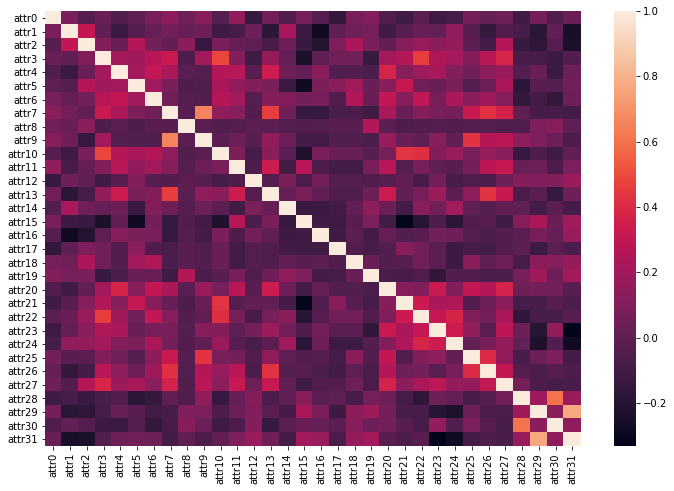

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df)
plt.show()

In [84]:
np.corrcoef(df_final.iloc[:, 15], df_final.iloc[:,10])

array([[ 1.        , -0.22083333],
       [-0.22083333,  1.        ]])

In [85]:
print(dicionario['attr10'])
print(dicionario['attr15'])

dificuldadenaáreaescolhida
oportunidadedeingressoemoutrafaculdadecommesmocurso


O coeficiente de correlação de Pearson exprime o grau de correlação entre duas variáveis, sendo $-1 \leq coeficiente \leq 1$. Quando esse coeficiente se aproxima de $1$ significa que existe uma relação linear entre as duas variáveis. Podemos observar o aumento no valor de uma variável assim que a outra variável também aumenta. Quando o coeficiente se aproxima de $-1$, temos uma correlação negativa. O aumento nos valores de uma variável acarreta na diminuição dos valores da outra variável. Importante ressaltar que, as correlações não implicam em uma relação de causalidade, necessário a análise do contexto das variáveis.

- Correlações positivas.

  - Attr9 e Attr7: Desligamento por reprovações em todas disciplinas dois semestres consecutivos, desligamento por coeficiente abaixo de 3 dois semestres consecutivos respectivamente.
  
    Nessa correlação, podemos observar um alto coeficiente de correlação, o que realemente possui algum sentido, pois reprovações em todas disciplinas em dois semestres consecutivos pode acarretar em uma queda de coeficiente, assim como, um coeficiente abaixo de 3 pode ter como causa as reprovações consecutivas, dessa forma, com o aumento de  uma das variáveis, a outra também soferá um aumento.

  - Attr10 e 3: Dificuldade na área escolhida e baixo rendimento nas disciplinas respectivamente.

    Nota-se aqui que, como descrito na definição dos coeficientes de correlação, podemos imaginar que, de acordo o grau de dificuldade na área escolhida aumenta, pode aumentar também o baixo rendimento nas disciplinas.

  - Attr22 e Attr3: Problemas com aprendizado em relação ao conteúdo e baixo rendimento nas disciplinas respectivamente.

    Seguindo o mesmo raciocíneo, nota-se que, assim que o atributo Attr23 cresce, observaremos também um aumento do atributo Attr4. Problemas com o aprendizado ao conteúdo podem aumentar o baixo rendimento nas disciplinas.

  - Attr13 e Attr7: Fim de relacionamento e desligamento por coeficiente abaixo de 3 dois semestres consecutivos.

  - Attr21/22 e Attr10: Problemas de adaptação com o curso / problemas com aprendizado em relação ao conteúdo  e dificuldade na área escolhida.

    Observamos aqui uma correlação moderada. Podemos observar uma correlação com o que pode realemente acontecer, pois, se há tanto problemas na adaptação ao curso quanto problemas com aprendizado em relação ao conteúdo, ambos podem acarretar em dificuldades na área escolhida.

- Correlações negativas.

  - Attr3 e Attr15: Baixo rendimento nas disciplinas e Oportunidade de ingresso em outra faculdade com mesmo curso.

    Ambos os atributos possuem intervalos de variação positivo. Podemos observar, traçando um paralelo com a realidade, que uma grande queda nos rendimentos na disciplina pode diminuir a oportunidade de ingresso em outra faculdade com mesmo curso. Visto que, comente os alunos com alto rendimento podem se transferir para outra faculdade com mesmo curso'

  - Attr5 e Attr15: Desinteresse com curso escolhido e oportunidade de ingresso em outra faculdade com mesmo curso.

    Ambos os atributos possuem intervalos de variação de positivo. Assim como a correlação descrita acima, temos um problema espefíco com o curso, portanto, com o aumento nos valores do atributo de Desinteresse com curso escolhido, observaremos uma diminuição nos valores do atributo oportunidade de ingresso em outra faculdade com mesmo curso.

  - Attr10 e Attr15: Dificuldade na área escolhida e oportunidade de ingresso em outra faculdade com mesmo curso.

    Ambos os atributos possuem intervalos de variação de positivo. Portanto, com o aumento nos valores do atributo de de dificuldade na área escolhida, observaremos uma diminuição nos valores do atributo oportunidade de ingresso em outra faculdade com mesmo curso. Ou seja, de acordo minha dificuldade na área em geral aumenta, menores serão as oportunidades de ingresso em outra faculdade com o mesmo curso.

  - Attr21 e Atrr15: Problema de adaptação com o curso e oportunidade de ingresso em outra faculdade com mesmo curso.

    Ambos os atributos possuem intervalos de variação positivo. Notemos que, nessa correlação negativa, se tomarmos por exemplo um aumento nos valores do atributo de adaptação com o curso, teremos pela correlação uma diminuição nos valores de ingresso em outra faculdade com o mesmo curso. Fazendo uma análise com o mundo real, podemos observar uma boa descrição, visto que o problema está especificamente no curso.

  - Attr23 e Atrr31: Problemas com professores específicos e negative_sent_en

    Para essa correlação é importante notar os intervalos de variação dos valores de cada atributo, sendo o 24, Problemas com professores específicos, tenso uma variação positiva entre $[0, 1]$, e o atributo negative_sent_en com uma variação negativa no intervalo $[-1, -4]$. Portanto, um crescimento nos valores do atributo Problemas com professores específicos, acarretará em uma diminuição nos valores de sentimento negativo, ou seja, esses valores tenderão a se distanciar de zero, tendo uma maior avaliação negativa. Assim como se esses valores aumentarem, se aproximarem de zero, menor o  sentimento negativo, os valores em Problemas com professores específicos diminuirão.'especificar que é do sentimento'

  - Attr2 e Attr31: Período de evasão e sentimento negativo inglês e portguês.

    Seguindo a mesma lógica, de acordo o período de evasão cresce, mais tempo o aluno está no curso, mais de zero se distancia o sentimento negativo, ou seja, se torna mais negativo, ou mais forte.




 - 2 Covariância

    - A covariância nos fornece a inter-dependência entre duas variáveis. Uma covariância igual a 0 indica que as duas variáveis são totalmente independentes, enquanto que uma covariância alta e positiva indica que uma variável é grande quando a outra é grande. Analogamente, uma covariância negativa e com valor absoluto alto indica que uma variável é pequena quando a outra é grande. Assim como os coeficientes da correlação, calculados anteriormente, contudo, os coeficientes da correlação variam de acordo a magnitude dos nossos dados.

### Aplicação do PCA

  Aplicaremos aqui o algoritmo de redução de dimensionalidade com o objetivo retirar a multicolinearidade da nossa base de dados e consequentemente, reduzi-la. O módulo utilizado foi preferido pelas facilidades geradas de vizualização dos nossos componentes principais, variância explicada e atributos mais importantes.

1 - Funcionamento do PCA

 - Ao utilizarmos o método de análise dos componentes principais, estaremos gerando uma matriz de covariância dos dados inseridos para análise, e extraímos então dessa matriz nossas componentes principais, auto vetores, que são retornados por ordem de importância, ou seja, para cada auto vetor, estará associado uma porcentagem que repesenta a variabilidade dos dados explicadas  pela componente.

 - Como nossos dados são 'reescritos' nas componentes principais, que por propriedade são ortogonais entre si, visto que são nossos auto vetores, nossa nova representação está livre de qualquer redundância para a explicação da variabilidade dos dados

 - A quantidade de componentes totais geradas será igual a quantidade de features contidas em nossa base de dados, de tal forma que cada componente terá a mesma dimensão das observações de todo o data frame inicial.

In [89]:
from pca import pca
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
! pip install plotly==4.8.0

     |████████████████████████████████| 11.5 MB 40 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [90]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

In [91]:
# Obtenção dos valores para serem inseridos no PCA
# e será aplicada também uma normalização
X = df_final.iloc[:,:].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Escolha da quantidade de componentes

In [92]:
pca1 = PCA()
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
pca1.explained_variance_

array([0.60994277, 0.30507516, 0.27143193, 0.2111693 , 0.19862418,
       0.17622555, 0.16120993, 0.15848873, 0.14907033, 0.1305335 ,
       0.10916292, 0.10831277, 0.09463369, 0.08183076, 0.07719203,
       0.06880183, 0.06705999, 0.055927  , 0.05382828, 0.04411784,
       0.04314138, 0.03365381, 0.02933101, 0.02546092, 0.02373949,
       0.02185875, 0.01962749, 0.01572302, 0.01262235, 0.01119519,
       0.00732469, 0.00556953])

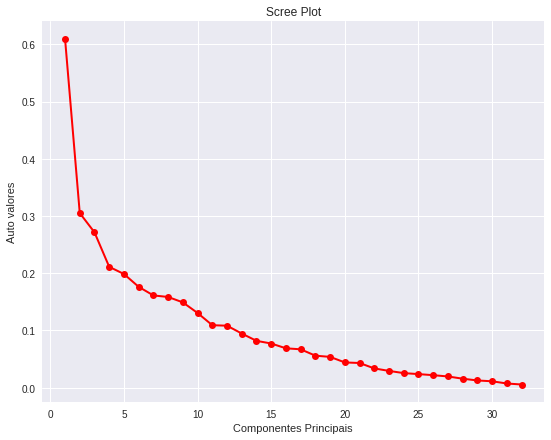

In [94]:
plt.style.use('seaborn')
plt.figure(figsize=(9,7))
plt.plot(range(1, pca1.n_components_ + 1), pca1.explained_variance_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Componentes Principais')
plt.ylabel('Auto valores')
plt.show()

In [95]:
print(pca1.explained_variance_ratio_.cumsum())

[0.1803558  0.27056438 0.3508249  0.41326618 0.47199796 0.52410662
 0.57177526 0.61863927 0.66271832 0.70131616 0.73359487 0.76562219
 0.79360471 0.81780149 0.84062663 0.86097085 0.88080002 0.89733724
 0.91325389 0.92629922 0.93905583 0.94900702 0.95768    0.96520861
 0.97222821 0.97869169 0.9844954  0.98914459 0.99287693 0.99618727
 0.99835313 1.        ]


In [179]:
# Optamos por reduzir nossa dimensionalidade de tal forma que
# preservaremos 80% da explicação dos nossos dados
model = pca(n_components=0.80)

In [180]:
scores_pca = model.fit_transform(X, verbose=0)

In [181]:
scores_pca['PC'].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
1.0,-1.060073,0.385629,-0.184174,-0.355069,0.251948,0.589011,-0.344681,-0.132332,0.200231,-0.042213,0.175093,0.274589,-0.021259,-0.024923
1.0,-0.470921,1.597739,-0.178995,0.103116,0.582589,0.294022,-0.738271,0.316835,0.170292,0.318114,-0.554555,0.243993,-0.217172,0.262791
1.0,0.579732,0.928002,-0.204167,-1.320315,0.404891,-0.358780,0.653232,0.348961,-0.340904,0.458437,1.008863,-0.168738,0.354879,0.162148
1.0,0.930779,-0.177392,1.208637,0.090098,0.439027,0.195331,0.119870,0.505586,0.152476,-0.731719,-0.121566,-0.433714,0.495717,0.185151
1.0,-0.307282,-0.562712,-0.153217,0.733284,-0.033434,-0.598419,-0.066002,0.432912,0.095801,-0.109301,0.298676,-0.045357,0.045125,0.028173


In [182]:
scores_pca['loadings'].iloc[0:14,0:33]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
PC1,-0.036513,-0.028358,0.055718,0.445882,0.083450,0.270249,0.103659,0.130727,-0.009768,0.045359,0.365176,0.071871,-0.009896,0.068868,0.015320,-0.215999,0.007499,0.018562,0.011998,-0.062136,0.082442,0.374559,0.332353,0.215820,0.234678,0.077307,0.148637,0.284561,-0.061115,-0.097446,-0.047578,-0.086986
PC2,0.407123,-0.022289,-0.009741,0.183548,0.053707,-0.082407,0.064349,0.235933,0.001784,0.130685,-0.063371,0.349756,-0.027717,0.173600,-0.044580,0.266483,-0.086523,-0.090170,0.021648,0.050481,0.095419,-0.354088,-0.039755,-0.063320,-0.152975,0.219858,0.331226,0.344311,0.020432,0.114950,-0.023439,0.101339
PC3,-0.149089,0.058255,0.029790,0.024238,-0.028541,-0.547690,-0.034077,0.075677,-0.003583,0.066458,-0.195783,-0.106331,-0.023162,0.006093,0.244789,0.026180,-0.152391,-0.038244,-0.093141,-0.107645,0.033616,-0.213160,0.134390,0.338915,0.305678,0.112460,0.048991,0.081425,0.093999,-0.274990,0.040831,-0.352577
PC4,-0.178664,0.008099,0.125437,-0.239447,0.001609,0.512101,-0.076342,0.086077,-0.004749,0.048938,-0.397147,0.083788,0.052089,0.049980,-0.100428,-0.147790,-0.047000,0.048313,0.014147,-0.077606,0.088671,-0.011638,-0.370470,0.148770,-0.001690,0.029653,0.076831,0.332219,0.073887,-0.206177,0.130671,-0.234120
PC5,-0.665482,-0.103346,-0.091306,0.021792,0.086814,-0.117224,-0.000678,-0.049741,-0.010853,0.002201,0.048228,0.113408,0.053165,0.073608,-0.121218,0.264547,0.216691,-0.012058,-0.009427,-0.036573,0.110088,0.007133,0.011693,0.194501,-0.045143,0.057461,0.099514,0.129765,0.244420,0.302739,0.199400,0.289407
PC6,0.430231,0.010024,0.047353,-0.167556,0.018808,0.092890,0.048817,-0.173260,0.011467,-0.055928,-0.157782,0.112564,0.017583,-0.048141,0.047303,0.197408,0.076991,-0.094840,0.050128,0.191315,0.030583,0.150051,0.183276,0.351066,0.313098,-0.139783,-0.326748,0.121266,0.237314,0.177324,0.293287,0.106288
PC7,0.153294,-0.003836,-0.067828,0.182948,0.008354,0.051019,-0.001825,0.037933,-0.002064,0.050868,-0.047759,-0.266900,0.033234,-0.035782,0.022354,-0.358447,0.709317,-0.078728,0.065615,-0.138903,0.018827,-0.388534,-0.046441,0.091390,0.041976,0.117171,-0.045482,-0.009715,0.029129,0.040789,0.092293,0.058222
PC8,-0.183830,-0.027572,0.064319,-0.048193,0.117318,0.212582,0.177057,-0.163402,-0.011710,-0.204445,0.014565,0.301546,-0.013642,0.049514,0.096758,0.287502,0.242865,-0.032793,-0.053386,0.037962,-0.018746,-0.364213,0.121786,-0.031304,0.259342,-0.237612,-0.092905,0.010423,-0.294435,-0.177000,-0.380967,-0.073953
PC9,-0.210025,0.094210,0.063401,0.047855,-0.017997,0.170054,0.042132,0.067424,0.019877,0.027797,-0.085928,-0.084917,0.053726,-0.014903,0.591139,-0.261127,-0.233974,-0.029413,0.102820,0.375977,0.007650,-0.215920,0.096996,-0.267981,0.140350,-0.004385,0.011084,0.101401,0.097591,0.196965,0.065698,0.224581
PC10,0.052207,-0.010932,-0.104216,-0.527575,0.064604,-0.005356,0.114155,0.079393,0.001060,0.053322,0.120107,0.083294,-0.009509,0.110688,0.129368,-0.041348,0.204441,-0.170995,-0.048851,0.107041,0.084163,0.230186,-0.073025,-0.050510,0.323560,0.374778,0.396062,-0.251815,-0.101696,0.026013,-0.012129,-0.001329


In [183]:
pd.options.plotting.backend = "plotly"
teste = np.abs(scores_pca['loadings'].iloc[0:14,0:33])
teste.columns = new_columns
fig = teste.plot(kind='barh')

fig.update_layout(title = 'Contribuição dos 32 atributos em cada uma das 14 primeiras componentes',
                        titlefont = {'family': 'Arial',
                                    'size': 18,
                                    'color': 'black'},
                        xaxis = {'title': 'Atributos'},
                        yaxis = {'title': 'Componentes'})

fig.show()

In [184]:
scores_pca['PC'].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
1.0,-1.060073,0.385629,-0.184174,-0.355069,0.251948,0.589011,-0.344681,-0.132332,0.200231,-0.042213,0.175093,0.274589,-0.021259,-0.024923
1.0,-0.470921,1.597739,-0.178995,0.103116,0.582589,0.294022,-0.738271,0.316835,0.170292,0.318114,-0.554555,0.243993,-0.217172,0.262791
1.0,0.579732,0.928002,-0.204167,-1.320315,0.404891,-0.358780,0.653232,0.348961,-0.340904,0.458437,1.008863,-0.168738,0.354879,0.162148
1.0,0.930779,-0.177392,1.208637,0.090098,0.439027,0.195331,0.119870,0.505586,0.152476,-0.731719,-0.121566,-0.433714,0.495717,0.185151
1.0,-0.307282,-0.562712,-0.153217,0.733284,-0.033434,-0.598419,-0.066002,0.432912,0.095801,-0.109301,0.298676,-0.045357,0.045125,0.028173


4 - Obtenção das features mais importantes e obtenção da taxa de variabilidade explicada.

- Para cada componente, a features mais importante será a de maior valor absoluto, ou seja, que mais teve influência para explicabilidade daquela componente.

In [185]:
## topfeat pega a variável de maior valor absoluto em cada componente
print(scores_pca['topfeat'])

      PC feature   loading  type
0    PC1       4  0.445882  best
1    PC2       1  0.407123  best
2    PC3       6 -0.547690  best
3    PC4       6  0.512101  best
4    PC5       1 -0.665482  best
5    PC6       1  0.430231  best
6    PC7      17  0.709317  best
7    PC8      31 -0.380967  best
8    PC9      15  0.591139  best
9   PC10       4 -0.527575  best
10  PC11      28 -0.436002  best
11  PC12      29  0.451916  best
12  PC13      25  0.514447  best
13  PC14      23  0.440908  best
14  PC15      20  0.526835  best
15  PC16      20  0.565001  best
16  PC17       8 -0.442837  best
17  PC18      12  0.402835  best
18  PC19      27 -0.403691  best
19  PC20       7  0.489128  best
20  PC21      18  0.744233  best
21  PC22      19  0.451342  best
22  PC23       5  0.415377  best
23  PC24       2  0.595439  best
24  PC25      14 -0.544417  best
25  PC26      13  0.525236  best
26  PC27       2  0.717627  best
27  PC28       5  0.430770  best
28  PC29      13  0.577361  best
29  PC30  

 - O módulo utilizado para a análise nos retorna diretamente a soma cumulativa da explicação de cada componente, no entanto, seria interessante também observar a quantidade exata de explicabilidade de cada componente


In [186]:
# Varaiação explicada cumulativa
scores_pca['explained_var']

array([0.1803558 , 0.27056438, 0.3508249 , 0.41326618, 0.47199796,
       0.52410662, 0.57177526, 0.61863927, 0.66271832, 0.70131616,
       0.73359487, 0.76562219, 0.79360471, 0.81780149, 0.84062663,
       0.86097085, 0.88080002, 0.89733724, 0.91325389, 0.92629922,
       0.93905583, 0.94900702, 0.95768   , 0.96520861, 0.97222821,
       0.97869169, 0.9844954 , 0.98914459, 0.99287693, 0.99618727,
       0.99835313, 1.        ])

In [187]:
# Obtenção da porcentagem de explicação de cada componente
size = len(scores_pca['explained_var'])
explained_variance = np.zeros(size)

# Percorreremos do n-ésimo valor em 'explained_var' até o penúltimo
# realizando uma diferença entre o valor atual e o posterior.
for i in range(size - 1, 0, -1):
  explained_variance[i] = (scores_pca['explained_var'][i] - scores_pca['explained_var'][i - 1]) * 100

explained_variance[0] = scores_pca['explained_var'][0] * 100
print(explained_variance)

[18.03557983  9.0208585   8.02605179  6.24412821  5.87317758  5.21086604
  4.76686444  4.68640049  4.40790508  3.8597839   3.22787085  3.20273258
  2.79825189  2.41967808  2.28251422  2.03442193  1.9829168   1.6537222
  1.59166454  1.30453346  1.27566036  0.99511947  0.86729747  0.75286144
  0.70196011  0.64634803  0.58037101  0.46491882  0.37323398  0.33103402
  0.21658587  0.16468703]


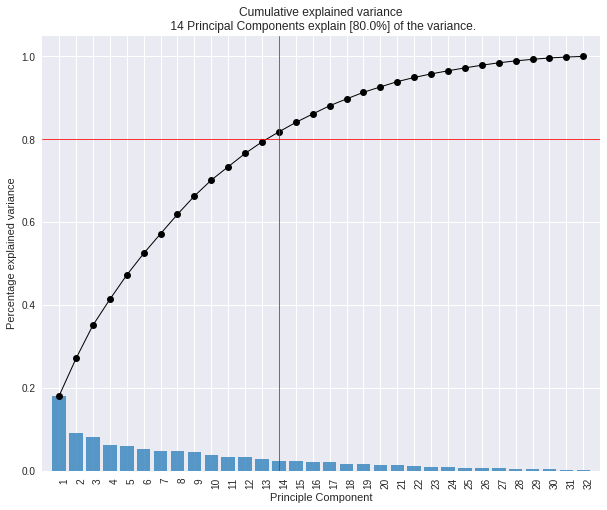

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a25cccad0>)

<Figure size 576x396 with 0 Axes>

In [188]:
model.plot()

In [189]:

fig = px.scatter(scores_pca['PC'], x='PC1', y='PC2', title='Cargas fatoriais nas duas primeiras componentes principais')

for i in range(10):

  fig.add_shape(
      type = 'line',
      x0=0, y0=0,
      x1=scores_pca['loadings'].iloc[0, i],
      y1=scores_pca['loadings'].iloc[1, i]
  )
  fig.add_annotation(
      x=scores_pca['loadings'].iloc[0, i],
      y=scores_pca['loadings'].iloc[1, i],
      ax=0, ay=0,
      xanchor="center",
      yanchor="bottom",
      text='attr'+str(i+1)
  )
fig.show()

### Clusterização

Para realizar a clusterização, precisamos inserir na classe de entrada a quantidade de clusters que desejamos separar nossos dados. Porém, não temos informações sobre as classes ou qualquer outra sobre  como a nossa base de dados está disposta. Assim sendo, precisaremos de métricas para validar a melhor quantidade de clusters possíveis que melhor se adapta aos nossos dados.

- Serão utilizadas aqui duas métricas:

  - 1 - Método do cotovelo (Elbow method).
  - 2 - Average Sillhouette.


In [190]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

 - 1 Método do cotovelo (Elbow method)

  - Heurística para determinar o nosso número ideal de cluster. Para aplicar o método, criaremos diversos clusters em um range desejado, e compararemos então a soma dos quadrados intra-clusters *(within-clusters sum-of-squares ou wcss*), a ideia é que, ao aumentarmos a quantidade de cluster as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Precisamos achar um equilíbrio de forma que as distâncias entre as observações em cluster seja a menor possível.
  - É possível notar essa diferença, o ponto de corte, plotando um gráfico das somas dos quadrados intra-clusters e, segundo o método, a quantidade ideal será o número de clusters onde a curva a partir se torna estável. 

In [191]:
## Soma das distâncias quadradas intra cluster
wcss = []
for i in range (1, 26):
  kmeans_pca = KMeans(n_clusters = i, random_state=15)
  kmeans_pca.fit(scores_pca['PC'])
  wcss.append(kmeans_pca.inertia_)

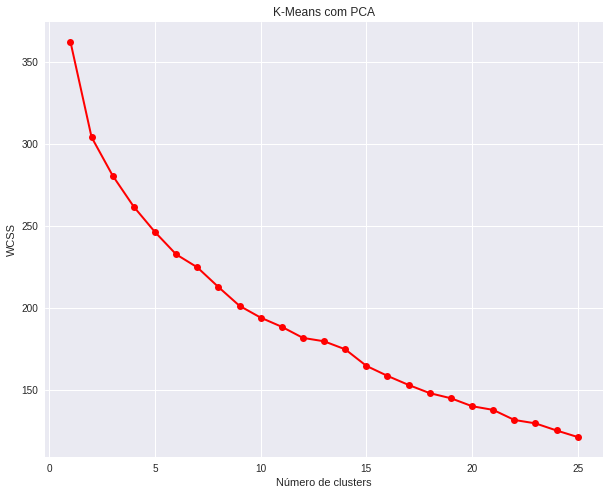

In [192]:
plt.figure(figsize = (10,8))
plt.plot(range(1,26), wcss, 'ro-', linewidth = 2)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('K-Means com PCA')
plt.show()

 - 2 Average Sillhouette.

    - A análise por silhouette nos da a informação do quão bem cada ponto está localizado em nossos clusters. Fazemos então a medida do quão perto nossos pontos de um cluster estão pertos de outro cluster mais próximo. Este cálculo é feito da seguinte forma:

   $s(i)  = \frac{b(i) - a(i)}{max(b(i), a(i))}$

    - Onde:

    $s(i)$ é o nosso coeficiente de silhouette para o dado $i$.

    $a(i)$ é a distância média entre $i$ e todos os outros pontos em seu cluster.

    $b(i)$ é a distância média entre $i$ e todos os outros pontos do cluster mais próximo.

  - Conclusões: 

      A partir da fórmula destacada, podemos então concluir que:
      
       $-1 \leq s(i) \leq 1$

       Se $a(i) \geq b(i)$ isso nos diz que a distância média entre o ponto $i$ dos pontos seu cluster está maior do que a distância de $i$ para os pontos do cluster mais próximo, ou seja, um $s(i)$ negativo nos diz que o ponti $i$ não está no cluster que deveria pertencer.

       Com as observações feitas, podemos então partir para análise gráfica.

Para n_clusters = 2. A média da silhouette_score é : 0.20728034566687967
Para n_clusters = 3. A média da silhouette_score é : 0.10546769656480733
Para n_clusters = 4. A média da silhouette_score é : 0.11565992189577404
Para n_clusters = 5. A média da silhouette_score é : 0.11938515696418249
Para n_clusters = 6. A média da silhouette_score é : 0.12182190122995838
Para n_clusters = 7. A média da silhouette_score é : 0.11266058930007698
Para n_clusters = 8. A média da silhouette_score é : 0.13220754489159814
Para n_clusters = 9. A média da silhouette_score é : 0.13844442153204786
Para n_clusters = 10. A média da silhouette_score é : 0.1397931339844135


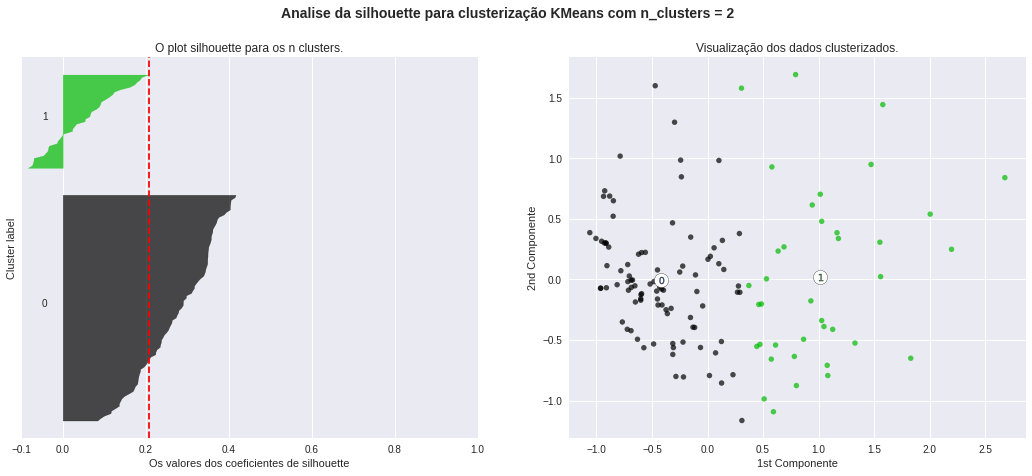

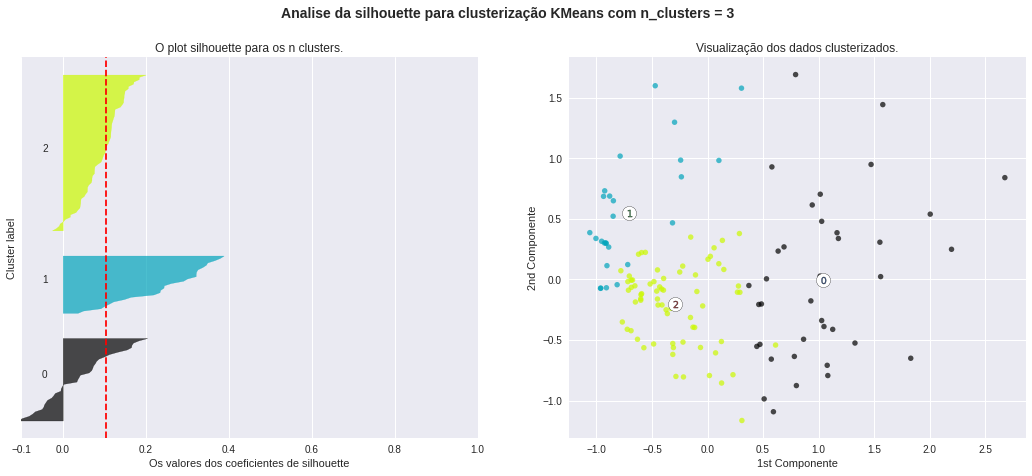

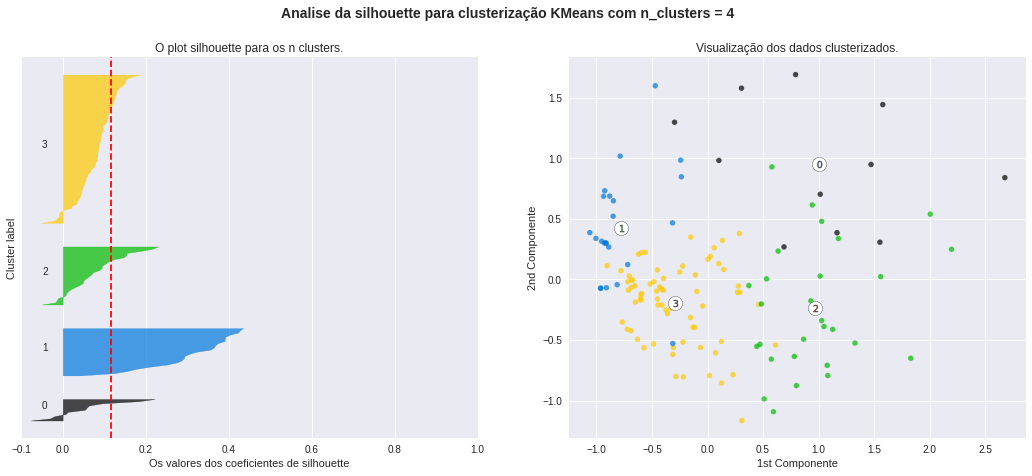

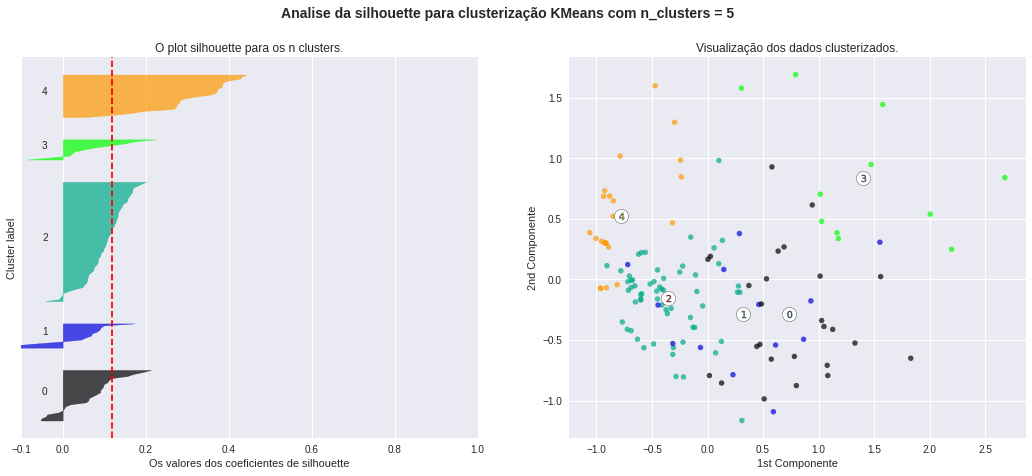

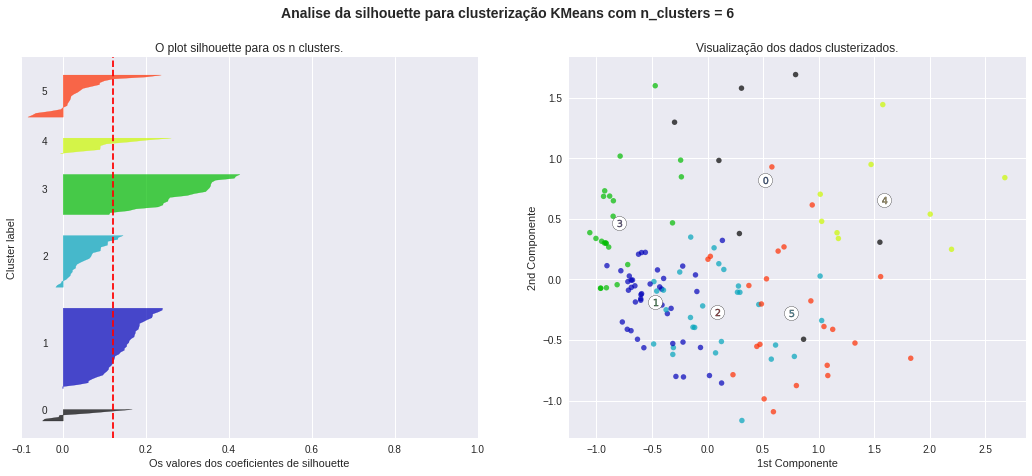

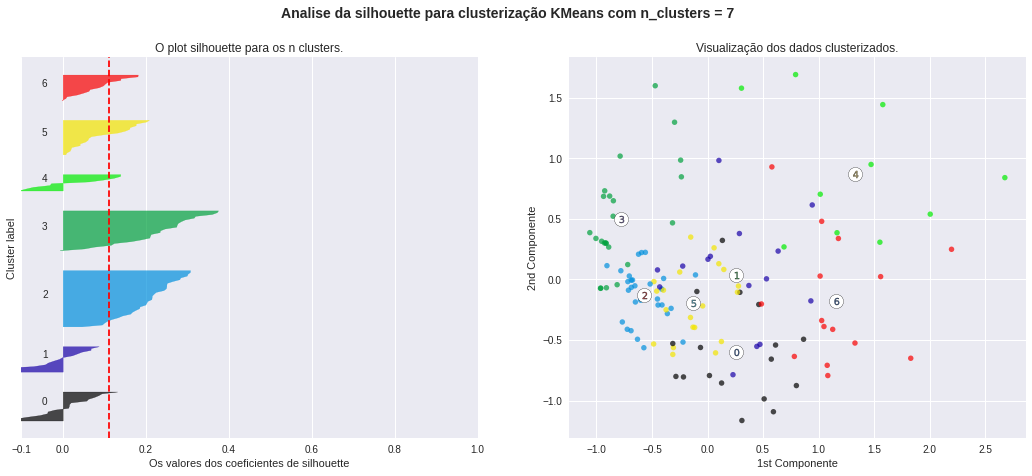

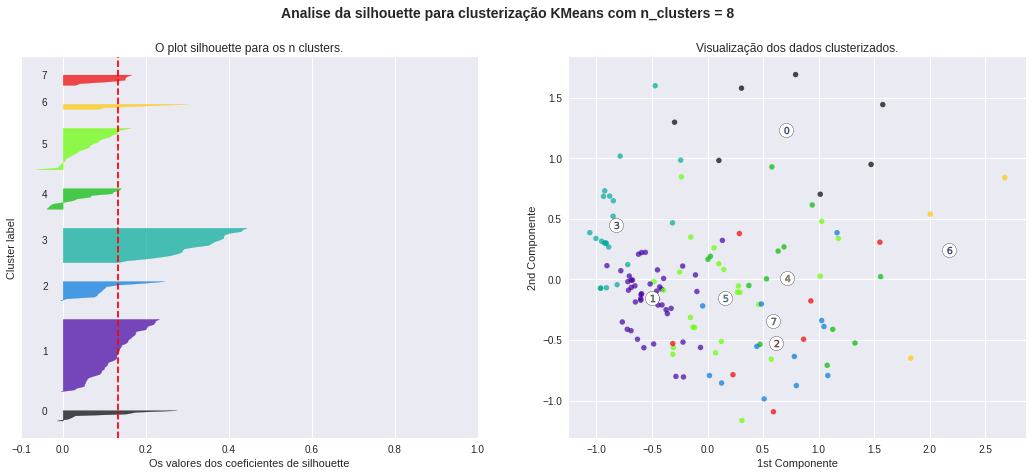

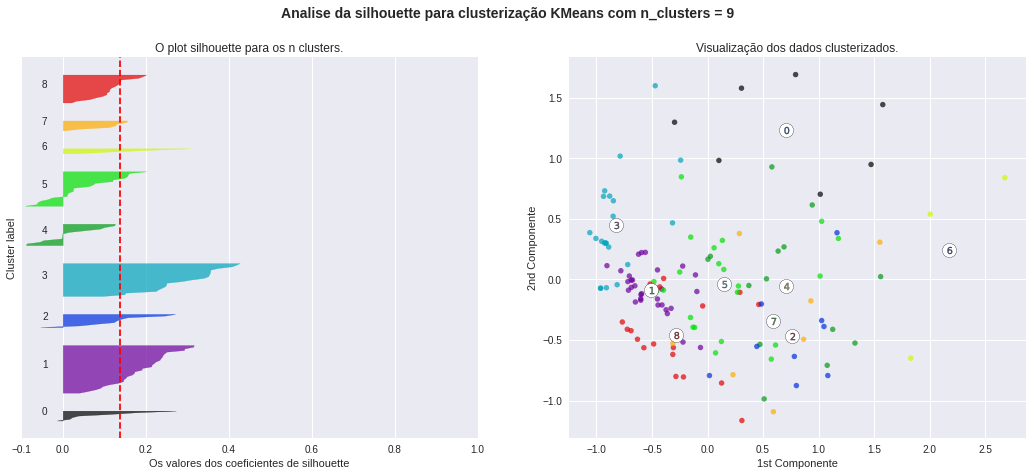

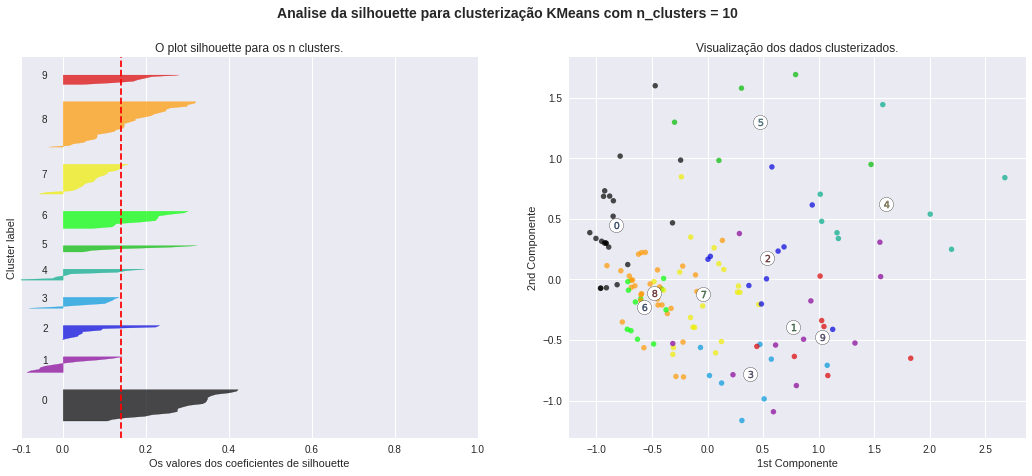

In [193]:
# Clusters gerados
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:

  # Criação de um subplot com 1 linha e duas colunas
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # O primeiro plot conterá os coeficieentes por silhouette
  # O Coeficiente por silhouette pode ter um range [-1, 1]
  ax1.set_xlim([-0.1, 1])

  # Inicialização do cluster com n_clusters do range definidos anteriormente 
  # seed setada para 15
  clusterer = KMeans(n_clusters=n_clusters, random_state=15)
  cluster_labels = clusterer.fit_predict(scores_pca['PC'])

  
  # O silhouette_score nos retorna uma média dos valores de todas as amostras
  # fornecendo uma perspectiva da densidade e separação formada pelos clusters
  silhouette_avg = silhouette_score(scores_pca['PC'], cluster_labels)

  print(f"Para n_clusters = {n_clusters}. A média da silhouette_score é : {silhouette_avg}")

  # Cálculo do silhouette score para cada amostra
  sample_silhouette_values = silhouette_samples(scores_pca['PC'], cluster_labels)

  y_lower = 5
  for i in range(n_clusters):

    # Agrega os silhouette scores de cada amostra pertecente ao cluster i
    # e ordena-os
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Configurações de plot
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Rotula os plot por silhouette gráficos com seus números de cluster no meio
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10 

  ax1.set_title("O plot silhouette para os n clusters.")
  ax1.set_xlabel("Os valores dos coeficientes de silhouette")
  ax1.set_ylabel("Cluster label")

  # Linha vertical para a média da silhouette de todas as amostras
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # Segundo plot, os clusters formados
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(scores_pca['PC'].iloc[:, 0], scores_pca['PC'].iloc[:, 1], marker='o', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')

  # Rotulando the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax2.set_title("Visualização dos dados clusterizados.")
  ax2.set_xlabel("1st Componente")
  ax2.set_ylabel("2nd Componente")

  plt.suptitle(("Analise da silhouette para clusterização KMeans com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Análise para 2 e 9 clusters

 - Obtenção dos resultados

  De acordo os gráficos obervados nas duas análises de clusterização e os valores retornados pela média da silhouette_score, concluímos então que o número ideal de cluster que melhor adapta aos nossos dados é n_cluster = 2.

- Visualização PCA para 9 clusters

In [194]:
## Clusterização para 5 clusters
kmeans_pca = KMeans(n_clusters = 9, random_state=15)
kmeans_pca.fit(scores_pca['PC'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=15, tol=0.0001, verbose=0)

In [195]:
# Adição dos dados reduzidos juntamente com os labels da clusterização onde cada dado
# foi clusterizado
outcome_pca = scores_pca['PC'].reset_index()
outcome_pca.drop(columns=['index'], inplace = True)
df_final_clustered = pd.concat([df_final, outcome_pca], axis = 1)
df_final_clustered['Cluster'] = kmeans_pca.labels_

In [196]:
df_final_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 47 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Sexo                                                                   132 non-null    int64  
 1   IdadeEvasao                                                            132 non-null    float64
 2   PeriodoEvasao                                                          132 non-null    int64  
 3   baixorendimentonasdisciplinas                                          132 non-null    float64
 4   cenáriopolíticoeconômicoinstável                                       132 non-null    float64
 5   desinteressecomcursoescolhido                                          132 non-null    float64
 6   desinteressecomcursosuperioremgeral                                    132 non-null    flo

In [197]:
df_final_clustered.Cluster = df_final_clustered.Cluster.astype('category')

In [198]:
df_final_clustered.head()

,Sexo,IdadeEvasao,PeriodoEvasao,baixorendimentonasdisciplinas,cenáriopolíticoeconômicoinstável,desinteressecomcursoescolhido,desinteressecomcursosuperioremgeral,desligamentoporcoeficienteabaixode3doissemestreconsecutivos,desligamentoporprazomáximo,desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos,dificuldadenaáreaescolhida,distanciamentodafamília,faixasalarialnãopromissora,fimderelacionamento,incompatibilidadedetempoentretrabalhoeestudo,oportunidadedeingressoemoutrafaculdadecommesmocurso,oportunidadedeingressoemoutrafaculdadeemcursodiferente,oportunidadedeingressonaufopemcursodiferente,oportunidadedeingressonoiceaemcursodiferente,oportunidadedetrabalho,perdasdeentesqueridos,problemadeadaptaçãocomocurso,problemascomaprendizadoemrelaçãoaoconteúdo,problemascomprofessoresespecíficos,problemascomumadisciplinaemespecífico,problemasfamiliares,problemasfinanceiros,problemaspsicológicos,positive_sent_pt,negative_sent_pt,positive_sent_en,negative_sent_en,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Cluster
0,1,19.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0,-1.060073,0.385629,-0.184174,-0.355069,0.251948,0.589011,-0.344681,-0.132332,0.200231,-0.042213,0.175093,0.274589,-0.021259,-0.024923,3
1,1,19.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-1.0,1.0,-1.0,-0.470921,1.597739,-0.178995,0.103116,0.582589,0.294022,-0.738271,0.316835,0.170292,0.318114,-0.554555,0.243993,-0.217172,0.262791,3
2,1,21.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-2.0,1.0,-1.0,0.579732,0.928002,-0.204167,-1.320315,0.404891,-0.358780,0.653232,0.348961,-0.340904,0.458437,1.008863,-0.168738,0.354879,0.162148,4
3,0,23.0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-2.0,1.0,-3.0,0.930779,-0.177392,1.208637,0.090098,0.439027,0.195331,0.119870,0.505586,0.152476,-0.731719,-0.121566,-0.433714,0.495717,0.185151,7
4,0,20.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,-3.0,-0.307282,-0.562712,-0.153217,0.733284,-0.033434,-0.598419,-0.066002,0.432912,0.095801,-0.109301,0.298676,-0.045357,0.045125,0.028173,8


- VISUALIZAÇÃO 2D

In [199]:
labels = {str(i): f"PC {i+1}" for i in range(4)}
labels['color'] = 'Cluster'

fig = px.scatter_matrix(
    df_final_clustered.iloc[:,32:36].values,
    color=df_final_clustered['Cluster'],
    dimensions=range(4),
    labels=labels,
    title='Vizualização da clusterização dos componentes',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [200]:
labels = {str(i): f"PC {i+5}" for i in range(4)}
labels['color'] = 'Cluster'

fig = px.scatter_matrix(
    df_final_clustered.iloc[:,37:41].values,
    color=df_final_clustered['Cluster'],
    dimensions=range(4),
    labels=labels,
    title='Vizualização da clusterização dos componentes',
)
fig.update_traces(diagonal_visible=False)
fig.show()

- VISUALIZAÇÃO 3D

In [201]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,32:35].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [202]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,35:38].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 4', '1': 'PC 5', '2': 'PC 6', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [203]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,38:41].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 7', '1': 'PC 8', '2': 'PC 9', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [204]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,41:44].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 10', '1': 'PC 11', '2': 'PC 12', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [205]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,43:46].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 12', '1': 'PC 13', '2': 'PC 14', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

- Visualização PCA para 2 clusters

In [206]:
# clusterização para k = 2.
kmeans_pca = KMeans(n_clusters = 2, random_state=15)
kmeans_pca.fit(scores_pca['PC'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=15, tol=0.0001, verbose=0)

In [207]:
# Adição dos dados reduzidos juntamente com os labels da clusterização onde cada dado
# foi clusterizado
outcome_pca = scores_pca['PC'].reset_index()
outcome_pca.drop(columns=['index'], inplace = True)
df_final_clustered = pd.concat([df_final, outcome_pca], axis = 1)
df_final_clustered['Cluster'] = kmeans_pca.labels_

In [208]:
df_final_clustered.head(10)

,Sexo,IdadeEvasao,PeriodoEvasao,baixorendimentonasdisciplinas,cenáriopolíticoeconômicoinstável,desinteressecomcursoescolhido,desinteressecomcursosuperioremgeral,desligamentoporcoeficienteabaixode3doissemestreconsecutivos,desligamentoporprazomáximo,desligamentoporreprovaçõesemtodasdisciplinasdoissemestresconsecutivos,dificuldadenaáreaescolhida,distanciamentodafamília,faixasalarialnãopromissora,fimderelacionamento,incompatibilidadedetempoentretrabalhoeestudo,oportunidadedeingressoemoutrafaculdadecommesmocurso,oportunidadedeingressoemoutrafaculdadeemcursodiferente,oportunidadedeingressonaufopemcursodiferente,oportunidadedeingressonoiceaemcursodiferente,oportunidadedetrabalho,perdasdeentesqueridos,problemadeadaptaçãocomocurso,problemascomaprendizadoemrelaçãoaoconteúdo,problemascomprofessoresespecíficos,problemascomumadisciplinaemespecífico,problemasfamiliares,problemasfinanceiros,problemaspsicológicos,positive_sent_pt,negative_sent_pt,positive_sent_en,negative_sent_en,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Cluster
0,1,19.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0,-1.060073,0.385629,-0.184174,-0.355069,0.251948,0.589011,-0.344681,-0.132332,0.200231,-0.042213,0.175093,0.274589,-0.021259,-0.024923,0
1,1,19.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-1.0,1.0,-1.0,-0.470921,1.597739,-0.178995,0.103116,0.582589,0.294022,-0.738271,0.316835,0.170292,0.318114,-0.554555,0.243993,-0.217172,0.262791,0
2,1,21.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-2.0,1.0,-1.0,0.579732,0.928002,-0.204167,-1.320315,0.404891,-0.358780,0.653232,0.348961,-0.340904,0.458437,1.008863,-0.168738,0.354879,0.162148,1
3,0,23.0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-2.0,1.0,-3.0,0.930779,-0.177392,1.208637,0.090098,0.439027,0.195331,0.119870,0.505586,0.152476,-0.731719,-0.121566,-0.433714,0.495717,0.185151,1
4,0,20.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,-3.0,-0.307282,-0.562712,-0.153217,0.733284,-0.033434,-0.598419,-0.066002,0.432912,0.095801,-0.109301,0.298676,-0.045357,0.045125,0.028173,0
5,1,20.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,-2.0,1.0,-2.0,0.636003,0.233370,0.148653,-0.410718,0.102209,0.141776,0.955389,0.289582,-0.120385,-0.233656,-0.735110,0.732120,0.132607,0.096579,1
6,1,19.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,-3.0,-0.601425,-0.159798,0.093571,0.004931,-0.368986,-0.180740,0.740485,0.285123,-0.516146,0.145008,-0.277474,0.003123,-0.170253,0.223507,0
7,1,17.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0,-1.004842,0.337958,-0.084539,-0.297237,0.308647,0.389821,-0.195118,-0.178568,-0.191042,-0.132578,0.130881,0.132412,0.197155,-0.224087,0
8,1,28.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,1.0,-2.0,-0.654015,-0.053158,0.301566,-0.173821,-0.550916,-0.105951,0.075075,0.057962,0.484175,0.059236,-0.160669,-0.203502,-0.375635,-0.212407,0
9,0,19.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,-1.0,-0.961425,-0.071975,0.072560,-0.098799,0.954003,-0.032535,-0.359073,0.013536,0.034279,-0.201461,0.183060,0.098624,0.238108,-0.152605,0


In [209]:
df_final_clustered.Cluster = df_final_clustered.Cluster.astype('category')

- VISUALIZAÇÃO 2D

In [210]:
labels = {str(i): f"PC {i+1}" for i in range(5)}
labels['color'] = 'Cluster'

fig = px.scatter_matrix(
    df_final_clustered.iloc[:,32:37].values,
    color=df_final_clustered['Cluster'],
    dimensions=range(5),
    labels=labels,
    title='Vizualização da clusterização dos componentes',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [211]:
labels = {str(i): f"PC {i+6}" for i in range(5)}
labels['color'] = 'Cluster'

fig = px.scatter_matrix(
    df_final_clustered.iloc[:,37:42].values,
    color=df_final_clustered['Cluster'],
    dimensions=range(5),
    labels=labels,
    title='Vizualização da clusterização dos componentes principais',
)
fig.update_traces(diagonal_visible=False)
fig.show()

- VIZUALIZAÇÃO 3D

In [212]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,32:35].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [213]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,35:38].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 4', '1': 'PC 5', '2': 'PC 6', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [214]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,38:41].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 7', '1': 'PC 8', '2': 'PC 9', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [215]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,41:44].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 10', '1': 'PC 11', '2': 'PC 12', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [216]:
fig = px.scatter_3d(
    df_final_clustered.iloc[:,43:46].values,
    x=0, y=1, z=2,
    color=df_final_clustered['Cluster'],
    labels={'0': 'PC 12', '1': 'PC 13', '2': 'PC 14', 'color': 'Cluster'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [217]:
if not(os.path.isfile('/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_clustered.csv')):
  df_final_clustered.to_csv("/content/drive/Shareddrives/Projeto ProAtiva Evasao/Dados/df_clustered.csv", index=False)